# Modeling - XGBoost
(Using the top **10** features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## XGBoost Modeling

In [7]:
# Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import xgboost as xgb

In [8]:
# Instatiating the model classifier
clf = xgb.XGBClassifier()

# Fitting to the Data
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBoost
Training Accuracy: 0.4946902117846957 		 Testing Accuracy: 0.4816129619515747


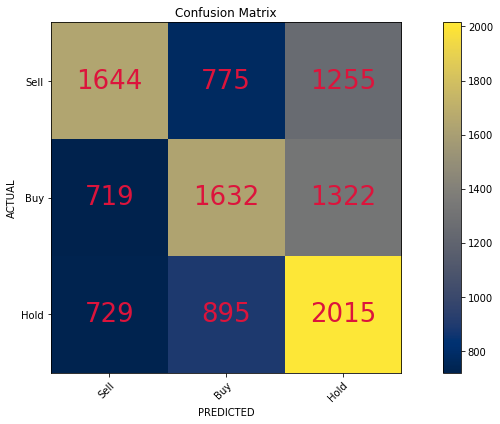

In [9]:
# Printing Results
print("XGBoost")

# Modeling and Confusion Matrix
mod_results(clf, X_train, X_test, y_train, y_test)

## XGBoost - Results
with the scaled top **10** features

In [10]:
# XGBoost
# Training Accuracy: 0.4946902117846957 		 Testing Accuracy: 0.4816129619515747

### RandomizedSearchCV - XGBoost

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
params = {"booster": ["gbtree", "gblinear", "dart"]}

In [22]:
ran_search = RandomizedSearchCV(clf, params, n_iter=1, verbose=5)

%timeit ran_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree ..................................................
[CV] ......... booster=gbtree, score=0.4741967780103759, total=   7.8s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4788822137265611, total=   7.6s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4776513427401001, total=   7.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree ..................................................
[CV] ......... booster=gbtree, score=0.4741967780103759, total=   7.3s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4788822137265611, total=   7.2s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.8s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4776513427401001, total=   7.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ...... booster=gblinear, score=0.43087284973150086, total=   2.5s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4417440378663754, total=   2.8s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4380518889394629, total=   2.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree ..................................................
[CV] ......... booster=gbtree, score=0.4741967780103759, total=   7.3s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4788822137265611, total=   7.1s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4776513427401001, total=   7.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=dart ....................................................
[CV] ........... booster=dart, score=0.4741967780103759, total=  18.7s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV] ........... booster=dart, score=0.4788822137265611, total=  18.0s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.2s remaining:    0.0s


[CV] ........... booster=dart, score=0.4776513427401001, total=  16.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ...... booster=gblinear, score=0.43087284973150086, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4417440378663754, total=   2.3s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4380518889394629, total=   2.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ...... booster=gblinear, score=0.43087284973150086, total=   2.3s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4417440378663754, total=   2.3s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.4380518889394629, total=   2.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree ..................................................
[CV] ......... booster=gbtree, score=0.4741967780103759, total=   7.3s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4788822137265611, total=   7.4s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.1s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4776513427401001, total=   7.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.5s finished


The slowest run took 7.43 times longer than the fastest. This could mean that an intermediate result is being cached.
30.3 s ± 22.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using tuned parameters on XGBoost

In [23]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

Mean Training Score: 0.5034892755965288


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Testing Score: 0.4946902117846957

Best Parameter Found:


{'booster': 'gbtree'}

SVM with tuned Parameters
Training Accuracy: 0.4946902117846957 		 Testing Accuracy: 0.4816129619515747


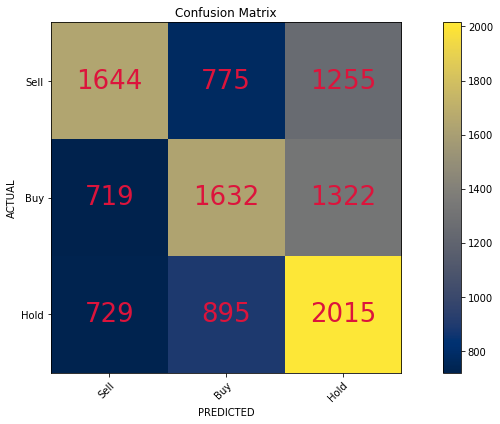

In [24]:
# Instatiating the model classifier with GridSearch's best parameters
clf = ran_search.best_estimator_

# Fitting the model
clf.fit(X_train, y_train)

# Printing Results
print("XGBoost with tuned Parameters")
mod_results(clf, X_train, X_test, y_train, y_test)

#### Compared to both the Top 5 and Top 20 classifiers, selecting the top 10 remains the best option.